In [1]:
import os
import cv2 as cv
import numpy as np
import random
from utils import DataHandler

# Q1

### Construct histogram

In [2]:
img_sel = [15, 15]
vocab_size = 64
datahandler = DataHandler(img_sel, vocab_size)
histogram_tr, label_tr, histogram_te, label_te = datahandler.load_data()

SIFT...
Clustering...
Shape of vocab:  (64, 128)
Contructing histogram for train set...
Shape of histogram_tr:  (150, 64) = (# of data, # of words)
Contructing histogram for test set...
Shape of histogram_te:  (150, 64) = (# of data, # of words)


### visualization

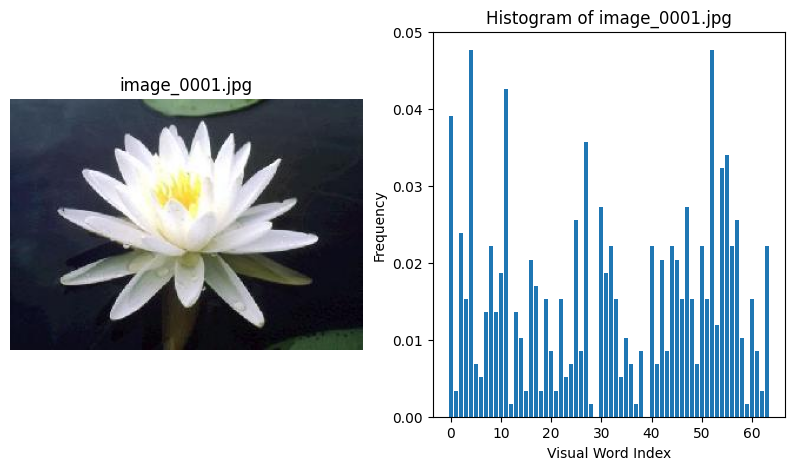

In [3]:
cls = 'water_lilly' # ['water_lilly', 'trilobite', 'wild_cat', 'wrench', 'wheelchair', 'yin_yang', 'umbrella', 'watch', 'windsor_chair', 'tick'
idx = 1 # 0~14
datahandler.visualization(True, cls, idx)

### save result

In [8]:
np.save('histogram_tr.npy', histogram_tr)
np.save('label_tr.npy', label_tr)
np.save('histogram_te.npy', histogram_te)
np.save('label_te.npy', label_te)
print(histogram_tr.shape, label_tr.shape, histogram_te.shape, label_te.shape)

(150, 64) (150,) (150, 64) (150,)


# Q2 RF Classifier

In [5]:
from sklearn.ensemble import RandomForestClassifier

In [19]:
model = RandomForestClassifier(n_estimators=5, random_state=0)
model.fit(histogram_tr, label_tr)

RandomForestClassifier(n_estimators=5, random_state=0)

# Q4 CNN

### data split

In [ ]:
from utils import DataHandler
img_sel = [15, 15]
vocab_size = 64
datahandler = DataHandler(img_sel, vocab_size)
datahandler.CNN_data_split()

In [3]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images to fit model expected input
    transforms.ToTensor(),           # Convert images to PyTorch tensors
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),  # Normalize for pre-trained models
])

train_dataset = datasets.ImageFolder(root='/Users/dongyoonhahm/KAIST/CS485/cw2/RF_code/train', transform=transform)
test_dataset = datasets.ImageFolder(root='/Users/dongyoonhahm/KAIST/CS485/cw2/RF_code/test', transform=transform)

train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

### test images